<a href="https://colab.research.google.com/github/imdad132/SIPRI-Military-Expenditures-1988-2024-Pearson-Correlation-and-Visualizations-Western-Europe/blob/main/SIPRI_Mil_Exp_ReDI_DA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To load different relevant libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To upload data manually from the local desktop
from google.colab import files
uploaded = files.upload()

Saving SIPRI-Milex-data-1974-2024.xlsx to SIPRI-Milex-data-1974-2024.xlsx


In [ ]:
df_Regional_totals= pd.read_excel('SIPRI-Milex-data-1974-2024.xlsx', sheet_name='Regional totals')
print(df_Regional_totals.head())

                              Region        1988        1989        1990  \
0                       North Africa    3.446906    3.589976    3.575339   
1                 sub-Saharan Africa   17.408527   17.626530   17.502362   
2  Central America and the Caribbean    5.150470    5.308959    4.912933   
3                      North America  817.765018  810.923925  777.997063   
4                      South America   39.613771   37.254878   32.171598   

        1991        1992        1993        1994        1995        1996  ...  \
0   3.697637    4.206792    4.429040    4.800439    4.576832    4.850587  ...   
1  14.622037   12.637005   14.872059   21.325807   11.332975   10.204002  ...   
2   4.716171    5.162724    5.272511    6.119866    5.267911    5.399258  ...   
3  688.05416  723.885586  686.067203  651.077772  608.317789  574.771748  ...   
4  28.438247   26.408153   30.901735   33.406427   39.352526   37.086364  ...   

         2015        2016        2017        2018       

In [ ]:
#To check for the missing values in the DataFrame
print(df_Regional_totals.isnull().sum())

Region    0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
2023      0
2024      0
dtype: int64


In [ ]:
#Region with the largest increase in military spending from 2023 to 2024
# At first, calculate the difference in military spending between 2024 and 2023 for each region
df_Regional_totals['Increase_2023_2024'] = df_Regional_totals[2024] - df_Regional_totals[2023]

# Find the region with the largest increase
region_largest_increase = df_Regional_totals.loc[df_Regional_totals['Increase_2023_2024'].idxmax()]['Region']

print(f"Region with the largest increase in military spending from 2023 to 2024: {region_largest_increase}")


Region with the largest increase in military spending from 2023 to 2024: North America


In [ ]:
# Find the row for 1988 and get the region with the maximum expenditure in that year
# Instead of filtering by a 'column' column, we assume the years are column headers
year_1988_column = 1988 # Verify this matches the actual column name
year_2024_column = 2024 # Verify this matches the actual column name

# Add a check to ensure the columns exist before trying to access them
if year_1988_column in df_Regional_totals.columns and year_2024_column in df_Regional_totals.columns:
    region_1988 = df_Regional_totals.loc[df_Regional_totals[year_1988_column].idxmax()]['Region']

    # Find the row for 2024 and get the region with the maximum expenditure in that year
    region_2024 = df_Regional_totals.loc[df_Regional_totals[year_2024_column].idxmax()]['Region']

    print(f"Region with highest military expenditures in 1988: {region_1988}")
    print(f"Region with highest military expenditures in 2024: {region_2024}")


Region with highest military expenditures in 1988: North America
Region with highest military expenditures in 2024: North America


In [ ]:
#Region with lowest military expenditures in 1988 and 2024
region_1988 = df_Regional_totals.loc[df_Regional_totals[year_1988_column].idxmin()]['Region']
region_2024 = df_Regional_totals.loc[df_Regional_totals[year_2024_column].idxmin()]['Region']
print(f"Region with lowest military expenditures in 1988: {region_1988}")
print(f"Region with lowest military expenditures in 2024: {region_2024}")

Region with lowest military expenditures in 1988: Central Asia
Region with lowest military expenditures in 2024: Central Asia


In [ ]:
#Region with largest rise in military expenditures between 1988 and 2024
# Calculate the difference in expenditures between 2024 and 1988 for each region
df_Regional_totals['Expenditure_Rise'] = df_Regional_totals[year_2024_column] - df_Regional_totals[year_1988_column]

# Find the region with the maximum expenditure rise
region_largest_rise = df_Regional_totals.loc[df_Regional_totals['Expenditure_Rise'].idxmax()]['Region']

print(f"Region with the largest rise in military expenditures between 1988 and 2024: {region_largest_rise}")


Region with the largest rise in military expenditures between 1988 and 2024: East Asia


In [ ]:
#Region with the steepest decline in military expenditures between 1988 and 2024

# Calculate the difference in expenditures between 2024 and 1988 for each region
df_Regional_totals['Expenditure_Decline'] = df_Regional_totals[year_2024_column] - df_Regional_totals[year_1988_column]

# Find the region with the maximum expenditure decline
region_largest_decline = df_Regional_totals.loc[df_Regional_totals['Expenditure_Decline'].idxmin()]['Region']

print(f"Region with the largest decline in military expenditures between 1988 and 2024: {region_largest_decline}")

Region with the largest decline in military expenditures between 1988 and 2024: Eastern Europe


In [ ]:
#Reading the DataFrame share of GDP in percent points
dfPercentage_Share_of_GDP= pd.read_excel('SIPRI-Milex-data-1974-2024.xlsx', sheet_name='Share of GDP')
print(dfPercentage_Share_of_GDP.head())

                  Country 1974 1975 1976 1977 1978 1979     1980      1981  \
0                     NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN       NaN   
1                  Europe  NaN  NaN  NaN  NaN  NaN  NaN      NaN       NaN   
2          Central Europe  NaN  NaN  NaN  NaN  NaN  NaN      NaN       NaN   
3                 Albania  ...  ...  ...  ...  ...  ...  0.06052  0.058483   
4  Bosnia and Herzegovina  ...  ...  ...  ...  ...  ...      ...       ...   

       1982  ...      2015      2016      2017      2018      2019      2020  \
0       NaN  ...       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN  ...       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN  ...       NaN       NaN       NaN       NaN       NaN       NaN   
3  0.056516  ...  0.011623  0.011036  0.011092  0.011605  0.012808  0.012958   
4       ...  ...  0.009889  0.009228  0.008526    0.0084  0.008073  0.008273   

       2021      2022      2023      2024  
0     

In [ ]:

#Creating a DataFrame with counrty name Western Europe and columns from year 1974 upto 2024
western_europe_countries = ['Austria','Belgium','Cyprus','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Luxembourg','Malta','Netherlands','Norway','Portugal','Spain','Sweden','Switzerland','United Kingdom']
df_Western_Europe = dfPercentage_Share_of_GDP[dfPercentage_Share_of_GDP['Country'].isin(western_europe_countries)]

df_Western_Europe

,Country,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
33,Austria,0.012769,0.014513,0.013652,0.01346,0.014292,0.014338,0.014202,0.013801,0.01413,...,0.007026,0.007337,0.007615,0.00749,0.007531,0.008858,0.008735,0.007667,0.008708,0.009998
34,Belgium,0.027614,0.03065,0.030934,0.031432,0.032615,0.032613,0.032502,0.03366,0.032699,...,0.009118,0.008981,0.008868,0.008924,0.00887,0.010059,0.010426,0.011625,0.011842,0.012771
35,Cyprus,...,...,...,...,...,...,...,...,...,...,0.016477,0.014046,0.015681,0.017498,0.017696,0.018955,0.017841,0.017212,0.016506,0.016474
36,Denmark,0.022348,0.023972,0.022042,0.022163,0.022718,0.022515,0.023631,0.024387,0.024199,...,0.011148,0.011511,0.0114,0.012831,0.012992,0.013738,0.012916,0.013616,0.019996,0.024162
37,Finland,0.012702,0.015082,0.013401,0.014054,0.014294,0.01479,0.016709,0.015456,0.016438,...,0.014582,0.014315,0.013609,0.013717,0.013613,0.014358,0.013024,0.015885,0.020075,0.022998
38,France,0.030864,0.031971,0.031561,0.032316,0.031515,0.031394,0.031552,0.032461,0.032238,...,0.018697,0.018517,0.018523,0.01846,0.018529,0.020217,0.019802,0.019577,0.01951,0.020526
39,Germany,0.03246,0.03268,0.03121,0.030242,0.030353,0.029504,0.029476,0.030278,0.030202,...,0.011154,0.011291,0.011313,0.011481,0.012401,0.01356,0.012998,0.013503,0.01488,0.018919
40,Greece,0.048245,0.058473,0.058292,0.059185,0.055754,0.051812,0.046608,0.057357,0.056266,...,0.024774,0.025728,0.025566,0.027005,0.025965,0.030231,0.038025,0.040004,0.028833,0.03128
41,Ireland,0.014069,0.01626,0.016152,0.015252,0.014831,0.015822,0.016653,0.015806,0.015912,...,0.003299,0.003279,0.002961,0.002801,0.002733,0.002627,0.002386,0.002125,0.002304,0.002391
42,Italy,0.020706,0.019752,0.018281,0.018908,0.018798,0.01874,0.017636,0.018211,0.020054,...,0.012025,0.013277,0.013512,0.013544,0.013061,0.017298,0.016629,0.016516,0.016065,0.016092


In [ ]:
#Find average share of GDP in military spending in 2024
print(df_Western_Europe[2024].mean())


0.016284739240259482


In [ ]:
#Finding the largest military spending country in 2024
print(df_Western_Europe.loc[df_Western_Europe[2024].idxmax()])


Country      Greece
1974       0.048245
1975       0.058473
1976       0.058292
1977       0.059185
1978       0.055754
1979       0.051812
1980       0.046608
1981       0.057357
1982       0.056266
1983       0.051725
1984       0.048354
1985       0.046926
1986        0.04128
1987       0.042555
1988       0.041982
1989       0.037659
1990       0.037983
1991       0.034849
1992       0.036298
1993       0.036001
1994        0.03582
1995       0.030966
1996       0.032373
1997        0.03296
1998       0.034554
1999       0.034942
2000       0.035948
2001       0.033563
2002       0.031657
2003       0.025628
2004        0.02672
2005       0.029017
2006       0.028297
2007       0.027192
2008       0.030237
2009        0.03269
2010       0.027568
2011       0.025202
2012       0.024764
2013       0.023913
2014       0.023678
2015       0.024774
2016       0.025728
2017       0.025566
2018       0.027005
2019       0.025965
2020       0.030231
2021       0.038025
2022       0.040004


In [ ]:
#Finding the smallest military spending country in 2024
print(df_Western_Europe.loc[df_Western_Europe[2024].idxmin()])

Country     Ireland
1974       0.014069
1975        0.01626
1976       0.016152
1977       0.015252
1978       0.014831
1979       0.015822
1980       0.016653
1981       0.015806
1982       0.015912
1983       0.014926
1984       0.014124
1985        0.01416
1986       0.014232
1987       0.012823
1988       0.011994
1989       0.011055
1990       0.012035
1991       0.012539
1992       0.012041
1993       0.011392
1994       0.011087
1995       0.010154
1996       0.009909
1997       0.009236
1998       0.008231
1999       0.007501
2000        0.00695
2001       0.007028
2002       0.006338
2003       0.005875
2004       0.005679
2005       0.005406
2006       0.005132
2007       0.005088
2008        0.00577
2009       0.006012
2010       0.005746
2011       0.005395
2012       0.005093
2013       0.004916
2014       0.004477
2015       0.003299
2016       0.003279
2017       0.002961
2018       0.002801
2019       0.002733
2020       0.002627
2021       0.002386
2022       0.002125


In [ ]:
#Finding top five military spenders in 2024 as of the share of GDP
top_5_spenders_2024=df_Western_Europe.sort_values(by=2024, ascending=False).head(5)
# Select only the 'Country' and '2024' columns
top_5_spenders_2024[['Country', 2024]]

,Country,2024
40,Greece,0.03128
36,Denmark,0.024162
37,Finland,0.022998
51,United Kingdom,0.022786
46,Norway,0.020912


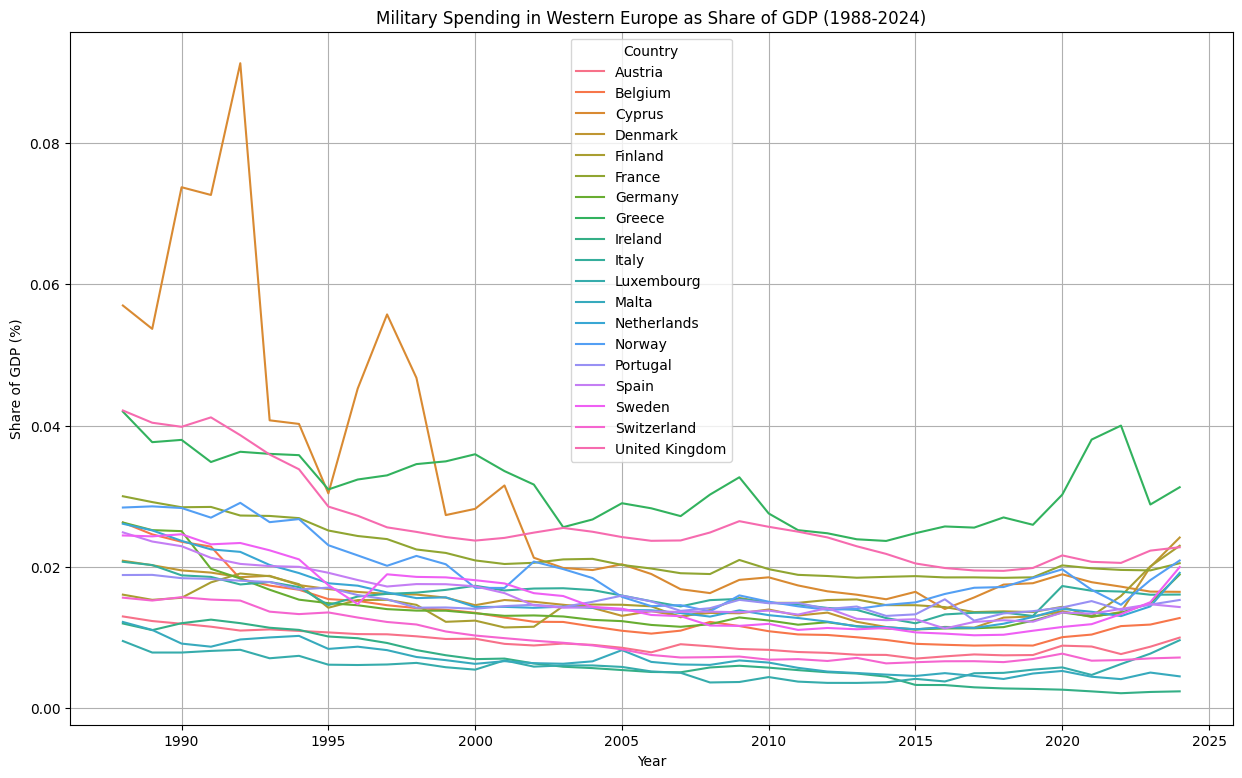

In [ ]:
#Finding the patterns of military spending as share of GDP in Western Europe between 1988 and 2024
##Drawing a time series map
selected_countries = ['Austria','Belgium','Cyprus','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Luxembourg','Malta','Netherlands','Norway','Portugal','Spain','Sweden','Switzerland','United Kingdom']
df_selected_countries = dfPercentage_Share_of_GDP[dfPercentage_Share_of_GDP['Country'].isin(selected_countries)].copy()

# Select the columns for years 1988 to 2024 and the 'Country' column
years_to_plot = list(range(1988, 2025))
columns_to_plot = ['Country'] + years_to_plot
df_plot = df_selected_countries[columns_to_plot]

# Melt the DataFrame to long format for easier plotting
df_plot_melted = df_plot.melt(id_vars='Country', var_name='Year', value_name='Share of GDP')

# Convert 'Year' column to numeric
df_plot_melted['Year'] = pd.to_numeric(df_plot_melted['Year'])

# Create the time series plot
plt.figure(figsize=(15, 9))
sns.lineplot(data=df_plot_melted, x='Year', y='Share of GDP', hue='Country')
plt.title('Military Spending in Western Europe as Share of GDP (1988-2024)')
plt.xlabel('Year')
plt.ylabel('Share of GDP (%)')
plt.grid(True)
plt.show()



In [ ]:
#Reading the DataFrame share of Govt spending in percentage points
dfPercentage_Share_of_Govt_spending= pd.read_excel('SIPRI-Milex-data-1974-2024.xlsx', sheet_name='Share of Govt. spending')
print(dfPercentage_Share_of_Govt_spending.head())

                  Country 1988 1989 1990 1991 1992 1993 1994 1995 1996  ...  \
0                     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1                  Europe  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2          Central Europe  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
3                 Albania  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4  Bosnia and Herzegovina  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   

       2015      2016      2017      2018      2019      2020      2021  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  0.037789  0.037872  0.038035  0.039913  0.044051  0.039808  0.038693   
4  0.023165  0.022259  0.021325  0.020782  0.020227  0.018229  0.022233   

       2022      2023      2024  
0       NaN       NaN       NaN  
1     

In [ ]:
#Creating a DataFrame with counrty name Western Europe and columns from year 1988 upto 2024
western_europe_countries = ['Austria','Belgium','Cyprus','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Luxembourg','Malta','Netherlands','Norway','Portugal','Spain','Sweden','Switzerland','United Kingdom']
df_Western_Europe = dfPercentage_Share_of_Govt_spending[dfPercentage_Share_of_Govt_spending['Country'].isin(western_europe_countries)]

df_Western_Europe

,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
33,Austria,0.027028,0.026357,0.025451,0.024112,0.02239,0.020575,0.020263,0.019012,0.018622,...,0.013653,0.014574,0.015361,0.01528,0.015417,0.01557,0.015586,0.014499,0.016565,0.018522
34,Belgium,0.046384,0.044702,0.042796,0.040626,0.032373,0.030054,0.03031,0.029341,0.028638,...,0.016926,0.016844,0.016982,0.017055,0.017115,0.017198,0.018929,0.022197,0.022128,0.023618
35,Cyprus,...,...,...,...,...,...,...,0.098929,0.137891,...,0.041754,0.037667,0.043067,0.041317,0.04686,0.043417,0.043863,0.046962,0.043126,0.042127
36,Denmark,0.036358,0.035135,0.034821,0.034598,0.032877,0.031514,0.029292,0.028713,0.028282,...,0.020486,0.021987,0.022529,0.025281,0.026085,0.025755,0.026129,0.030328,0.042697,0.050581
37,Finland,0.031529,0.031704,0.032151,0.030888,0.030334,0.028478,0.027364,0.023721,0.026188,...,0.025668,0.025512,0.025195,0.025525,0.02538,0.024933,0.023146,0.029488,0.035438,0.040511
38,France,0.057678,0.057341,0.055118,0.054041,0.050501,0.04814,0.048148,0.044881,0.043518,...,0.032463,0.032272,0.032122,0.032749,0.033479,0.032768,0.033302,0.033524,0.034234,0.035862
39,Germany,...,...,...,0.042413,0.038775,0.03471,0.031805,0.026924,0.029408,...,0.025062,0.02525,0.025384,0.025692,0.027218,0.026521,0.025633,0.027556,0.030756,0.039276
40,Greece,0.108102,0.094278,0.085918,0.086238,0.085658,0.081176,0.084488,0.066382,0.070155,...,0.047777,0.051157,0.052675,0.055601,0.054549,0.050988,0.067041,0.075761,0.059114,0.065801
41,Ireland,0.024939,0.026146,0.02773,0.027856,0.026269,0.02617,0.02569,0.025163,0.025697,...,0.011762,0.011929,0.01172,0.011312,0.011426,0.009827,0.01012,0.010285,0.010169,0.009984
42,Italy,0.040267,0.038341,0.032936,0.031827,0.030071,0.03014,0.030333,0.028372,0.030797,...,0.023919,0.02709,0.027679,0.028003,0.026955,0.030464,0.029678,0.03008,0.02986,0.031797


In [ ]:
#Replace missing values with NaN
df_Western_Europe.replace('...', np.nan, inplace=True)
print(df_Western_Europe.head())

    Country      1988      1989      1990      1991      1992      1993  \
33  Austria  0.027028  0.026357  0.025451  0.024112  0.022390  0.020575   
34  Belgium  0.046384  0.044702  0.042796  0.040626  0.032373  0.030054   
35   Cyprus       NaN       NaN       NaN       NaN       NaN       NaN   
36  Denmark  0.036358  0.035135  0.034821  0.034598  0.032877  0.031514   
37  Finland  0.031529  0.031704  0.032151  0.030888  0.030334  0.028478   

        1994      1995      1996  ...      2015      2016      2017      2018  \
33  0.020263  0.019012  0.018622  ...  0.013653  0.014574  0.015361  0.015280   
34  0.030310  0.029341  0.028638  ...  0.016926  0.016844  0.016982  0.017055   
35       NaN  0.098929  0.137891  ...  0.041754  0.037667  0.043067  0.041317   
36  0.029292  0.028713  0.028282  ...  0.020486  0.021987  0.022529  0.025281   
37  0.027364  0.023721  0.026188  ...  0.025668  0.025512  0.025195  0.025525   

        2019      2020      2021      2022      2023      2024

/tmp/ipython-input-19-686665374.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Western_Europe.replace('...', np.nan, inplace=True)
/tmp/ipython-input-19-686665374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Western_Europe.replace('...', np.nan, inplace=True)


In [ ]:
#Top five countries in terms of share of Govt spending in 2024
top_5_spenders_2024=df_Western_Europe.sort_values(by=2024, ascending=False).head(5)
# Select only the 'Country' and '2024' columns
top_5_spenders_2024[['Country', 2024]]

,Country,2024
40,Greece,0.065801
51,United Kingdom,0.052527
36,Denmark,0.050581
46,Norway,0.045306
45,Netherlands,0.043399


/tmp/ipython-input-21-3025078948.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['...', 'xxx'], np.nan, inplace=True)


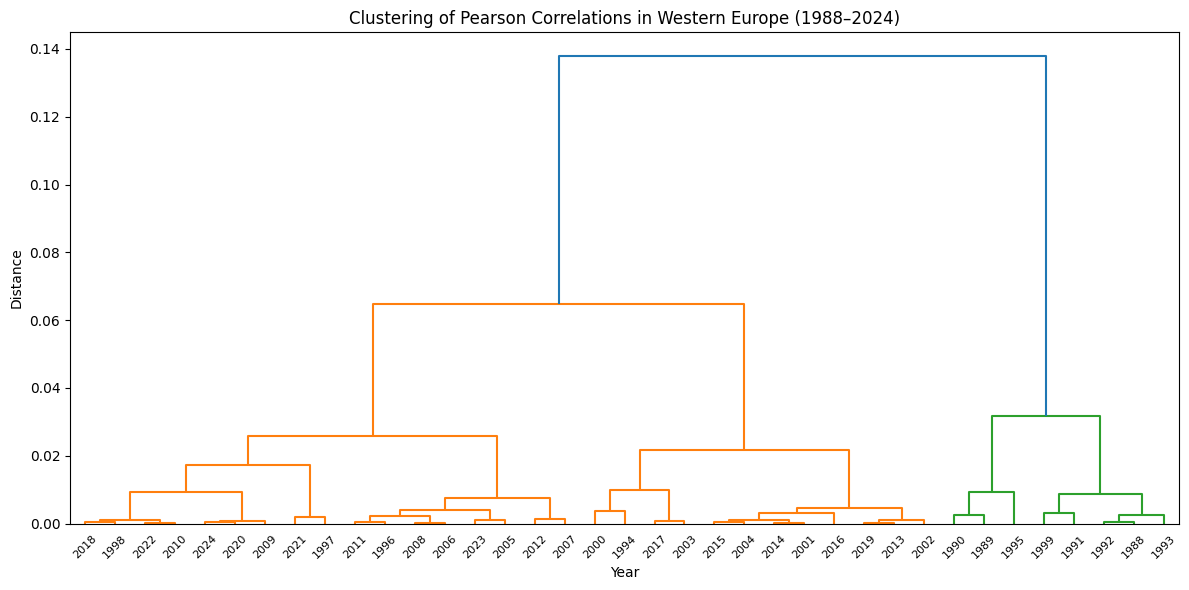

In [ ]:
#Calculating and displaying Pearson Correlation between share of GDP and share of Govt spending in Western Europe (1988-2024)

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr


# Define Western Europe countries
western_europe_countries = ['Austria','Belgium','Cyprus','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Luxembourg','Malta','Netherlands','Norway','Portugal','Spain','Sweden','Switzerland','United Kingdom']

# Filter the GDP and Govt spending dataframes for Western European countries
gdp_df = dfPercentage_Share_of_GDP[dfPercentage_Share_of_GDP['Country'].isin(western_europe_countries)].copy()
gov_df = dfPercentage_Share_of_Govt_spending[dfPercentage_Share_of_Govt_spending['Country'].isin(western_europe_countries)].copy()

# Replace '...' and 'xxx' with NaN and convert year columns to numeric
for df in [gdp_df, gov_df]:
    df.replace(['...', 'xxx'], np.nan, inplace=True)
    for col in df.columns:
        if isinstance(col, int):
            df[col] = pd.to_numeric(df[col], errors='coerce')


# Define the years to analyze by finding the intersection of year columns in both dataframes
gdp_years = [col for col in gdp_df.columns if isinstance(col, int)]
gov_years = [col for col in gov_df.columns if isinstance(col, int)]
years = sorted(list(set(gdp_years).intersection(gov_years)))

# Calculate Pearson correlation for each year
correlations = []
valid_years = []

for year in years:
    gdp_values = gdp_df[year]
    gov_values = gov_df[year]
    valid = gdp_values.notna() & gov_values.notna()
    if valid.sum() > 2: # Need at least 3 data points to calculate a correlation
        corr, _ = pearsonr(gdp_values[valid], gov_values[valid])
        correlations.append(corr)
        valid_years.append(year)

# Create a DataFrame for clustering
corr_df = pd.DataFrame(correlations, index=valid_years, columns=["Correlation"])

# Perform hierarchical clustering
linked = linkage(corr_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=valid_years, orientation='top', distance_sort='descending')
plt.title("Clustering of Pearson Correlations in Western Europe (1988–2024)")
plt.xlabel("Year")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()